<a href="https://colab.research.google.com/github/ArtemLatyshev1/lab6RO/blob/main/Mnist_Latyshev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Использование нейронной сети для распознавания цифр в Keras
Keras — открытая нейросетевая библиотека, написанная на языке Python. Она представляет собой надстройку над фреймворками TensorFlow + Theano и нацелена на оперативную работу с сетями глубокого обучения.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [ ]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Список с названиями классов

In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Просматриваем примеры изображений

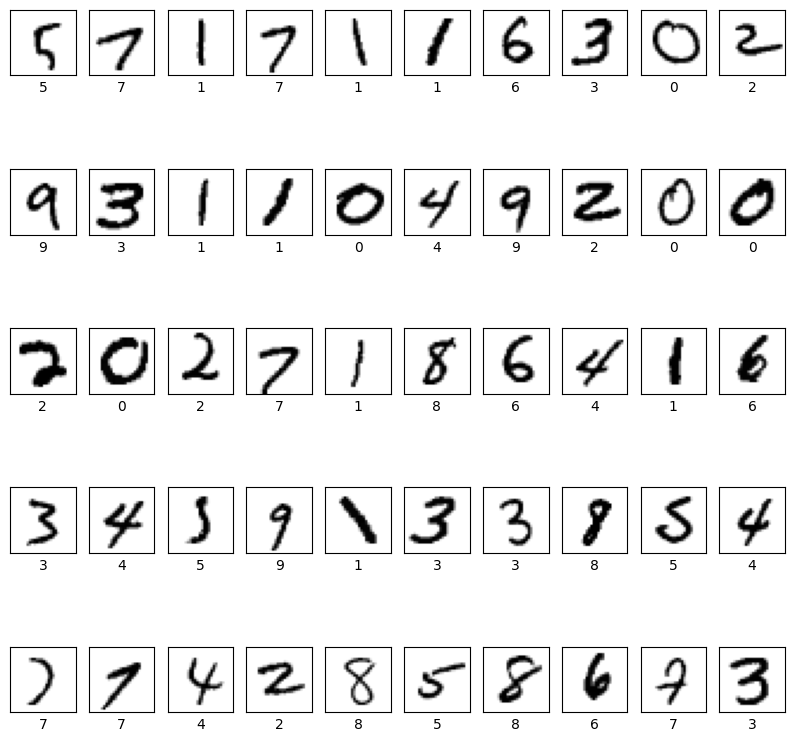

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [ ]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [ ]:
n = 0
print(y_train[n])

5


**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
# 'categorical_crossentropy' - функция штрафа, кроссэнтропия, которую следует использовать для задач классификации, как у нас,
#metrics=['accuracy'] значит, что мы будем вычислять в модели не только функцию штрафа, но и точность работы, то есть, число правильно классифицированных примеров.
#optimizer="SGD" Стохастический градиентный спуск (англ. Stochastic gradient descent, SGD)
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Обучаем нейронную сеть

Это самая ресурсоемкая операция. Мы выполняем обучение "пачками" (mini-batch) по batch_size=200 примеров. При этом, осуществляет epochs=100 проходов по всем входным примерам.

Другие варианты режима обучения:

1) по одному примеру - медленная сходимость, и алгоритм "не видит" хороших минимумов,

2) по всем примерам сразу - трудоемко, часто сходимость к локальному минимуму и склонность к переобучению.

А обработка mini-batch - промежуточный вариант, который называется градиентным стохастическим спуском

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/100
240/240 [==============================] - 7s 25ms/step - loss: 1.4267 - accuracy: 0.6795 - val_loss: 0.8665 - val_accuracy: 0.8380
Epoch 2/100
240/240 [==============================] - 5s 20ms/step - loss: 0.7282 - accuracy: 0.8449 - val_loss: 0.5759 - val_accuracy: 0.8712
Epoch 3/100
240/240 [==============================] - 4s 18ms/step - loss: 0.5531 - accuracy: 0.8678 - val_loss: 0.4717 - val_accuracy: 0.8850
Epoch 4/100
240/240 [==============================] - 6s 25ms/step - loss: 0.4758 - accuracy: 0.8802 - val_loss: 0.4187 - val_accuracy: 0.8948
Epoch 5/100
240/240 [==============================] - 5s 21ms/step - loss: 0.4312 - accuracy: 0.8880 - val_loss: 0.3855 - val_accuracy: 0.9003
Epoch 6/100
240/240 [==============================] - 5s 22ms/step - loss: 0.4012 - accuracy: 0.8936 - val_loss: 0.3634 - val_accuracy: 0.9052
Epoch 7/100
240/240 [==============================] - 6s 23ms/step - loss: 0.3796 - accuracy: 0.8978 - val_loss: 0.3471 - val_accuracy:

## Сохраняем нейронную сеть для последующего использования

In [ ]:
model.save('mnist_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.1300 - accuracy: 0.9625
Доля верных ответов на тестовых данных, в процентах: 96.25


## Используем сеть для распознавания цифр

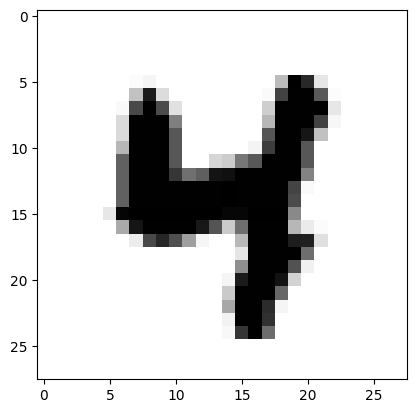

In [ ]:
n_rec = 85
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 101ms/step


**Печатаем результаты распознавания**

In [ ]:
prediction

array([[8.7984127e-09, 3.1519007e-09, 3.1427479e-08, 7.8400359e-07,
        9.9974829e-01, 1.9316815e-06, 1.3227950e-06, 8.5470504e-07,
        1.1101170e-04, 1.3578420e-04]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 4
Название класса: 4


**Печатаем правильный ответ**

In [ ]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 4
Название класса: 4


## Загружаем свои картинки

In [ ]:
files.upload()

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg


{'0.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x10\xd0Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01;\x00\x02\x00\x00\x00-\x00\x00\x08J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08x\x9c\x9d\x00\x01\x00\x00\x000\x00\x00\x10\x98\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

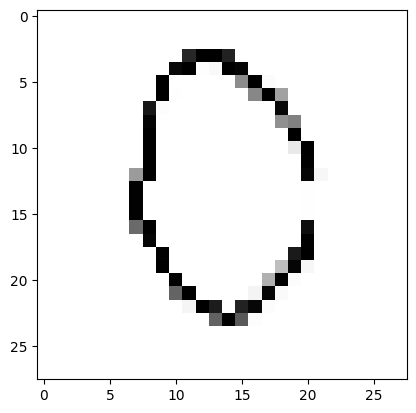

1/1 [==============================] - 0s 30ms/step
Номер класса: 0
Название класса: 0


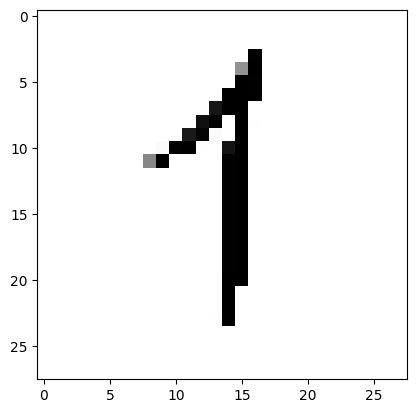

1/1 [==============================] - 0s 22ms/step
Номер класса: 1
Название класса: 1


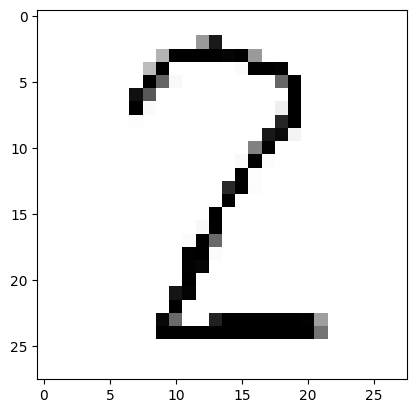

1/1 [==============================] - 0s 22ms/step
Номер класса: 2
Название класса: 2


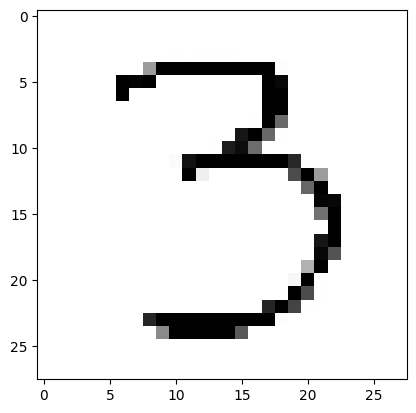

1/1 [==============================] - 0s 40ms/step
Номер класса: 3
Название класса: 3


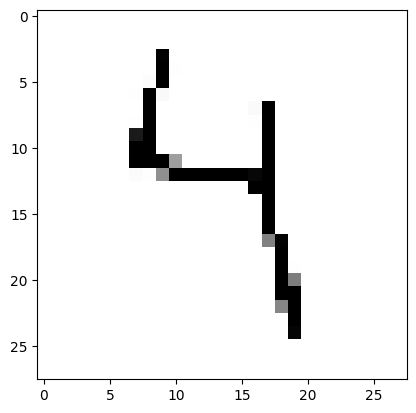

1/1 [==============================] - 0s 37ms/step
Номер класса: 4
Название класса: 4


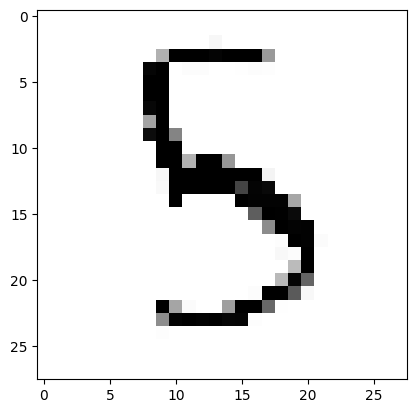

1/1 [==============================] - 0s 50ms/step
Номер класса: 5
Название класса: 5


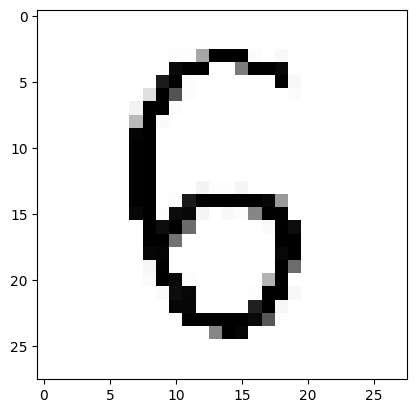

1/1 [==============================] - 0s 43ms/step
Номер класса: 6
Название класса: 6


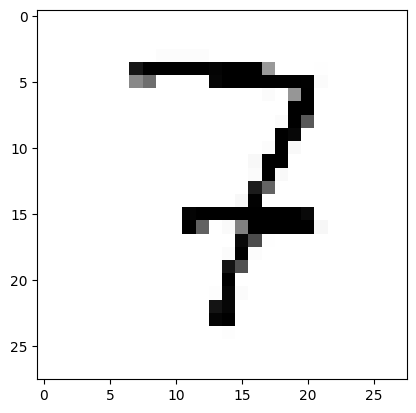

1/1 [==============================] - 0s 93ms/step
Номер класса: 3
Название класса: 3


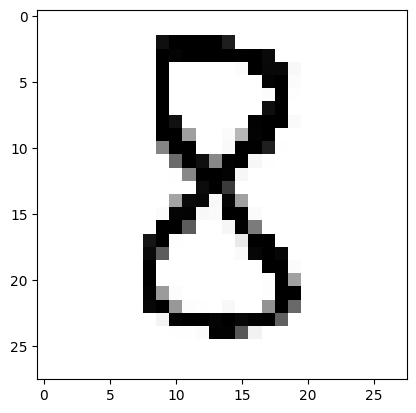

1/1 [==============================] - 0s 143ms/step
Номер класса: 8
Название класса: 8


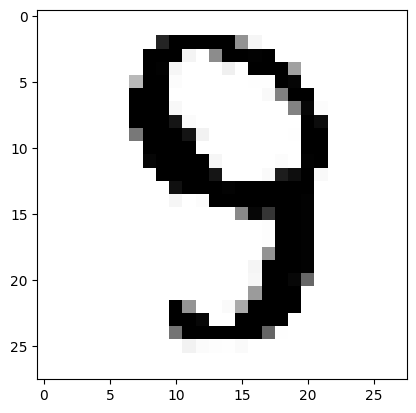

1/1 [==============================] - 0s 31ms/step
Номер класса: 5
Название класса: 5


In [ ]:
for i in range(0,10):
    img_path = str(i)+'.jpg'
    img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    plt.imshow(img.convert('RGBA'))
    plt.show()
    # Преобразуем картинку в массив
    x = image.img_to_array(img)
    # Меняем форму массива в плоский вектор
    x = x.reshape(1, 784)
    # Инвертируем изображение
    x = 255 - x
    # Нормализуем изображение
    x /= 255
    prediction = model.predict(x)
    prediction = np.argmax(prediction)
    print("Номер класса:", prediction)
    print("Название класса:", classes[prediction])